In [1]:
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
import drjit as dr
from PDE3D.Sampling import *
import sys
import numpy as np
from matplotlib import pyplot as plt

In [2]:
grad = False
newton_steps = 8
z = mi.Float(7)
R = mi.Float(12)
σ = dr.square(z / R)
npoints = 1000000
seed = 32
sampler = mi.PCG32(npoints)
np.random.seed(42)
init_state = np.random.randint(sys.maxsize, size = npoints)
init_seq = np.random.randint(sys.maxsize, size = npoints)
sampler.seed(initstate = init_state, initseq = init_seq)

In [3]:
gf = GreensFunction(newton_steps=10, grad = grad)

n = 9999
r = dr.arange(mi.Float, n+1) / n * R
fnc = gf.eval(r, R, σ)
pdf, cdf, norm = gf.eval_pdf(r, R, σ)
fncc = gf.eval(r, R, mi.Float(0))
pdfc, cdfc, normc = gf.eval_pdf(r, R, mi.Float(0))


print(dr.sum(fnc) * R / n)
print(norm)
print(dr.sum(fncc) * R / n)
print(normc)

[2.90126]
[2.90126]
[24]
[24]


In [4]:
print(dr.sum(pdf) * R / n)
print(dr.sum(pdfc) * R / n)

[1]
[1]


Text(0.5, 0.98, 'Analytic')

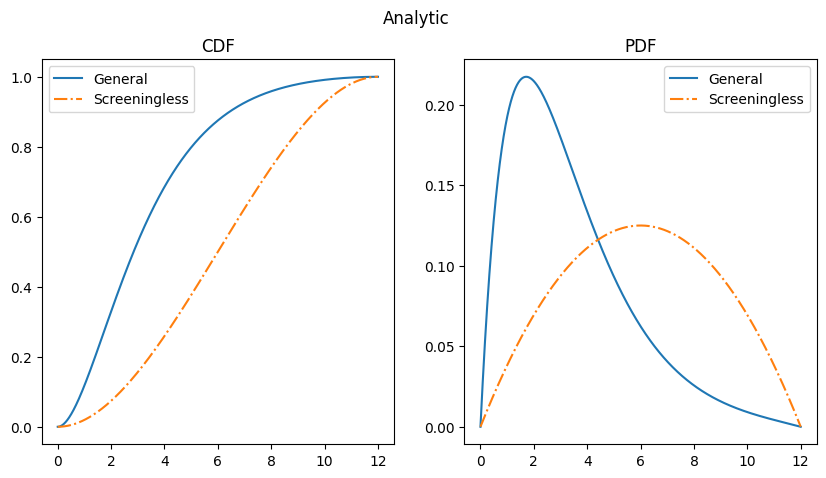

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(r.numpy(), cdf.numpy(), label = "General")
ax1.plot(r.numpy(), cdfc.numpy(), label = "Screeningless", ls = "-.")
ax2.plot(r.numpy(), pdf.numpy(), label = "General")
ax2.plot(r.numpy(), pdfc.numpy(), label = "Screeningless", ls = "-.")

ax1.legend()
ax2.legend()
ax1.set_title("CDF")
ax2.set_title("PDF")
fig.suptitle("Analytic")

In [6]:
sample = sampler.next_float32()

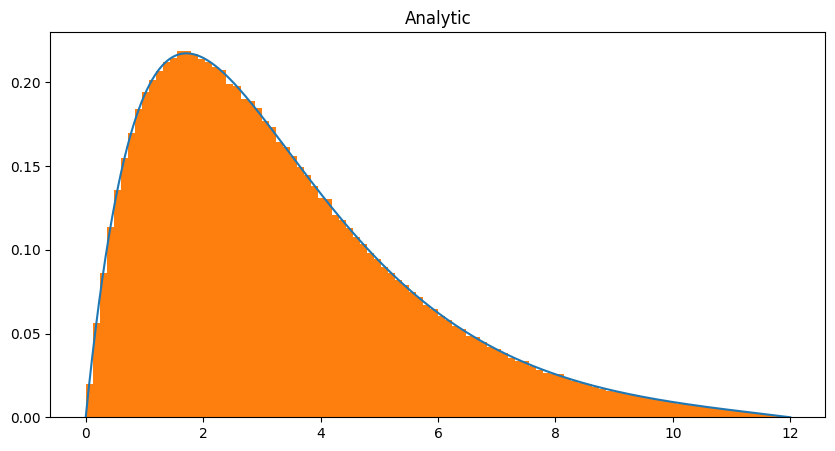

In [7]:
fig, (ax1) = plt.subplots(1,1, figsize = (10,5))
sample_analytic, norm_analytic = gf.sample(mi.Float(sample), R, σ)
ax1.plot(r.numpy(), pdf.numpy())
ax1.set_title("Analytic")
ax1.hist(sample_analytic.numpy(), density = True, bins = 100);

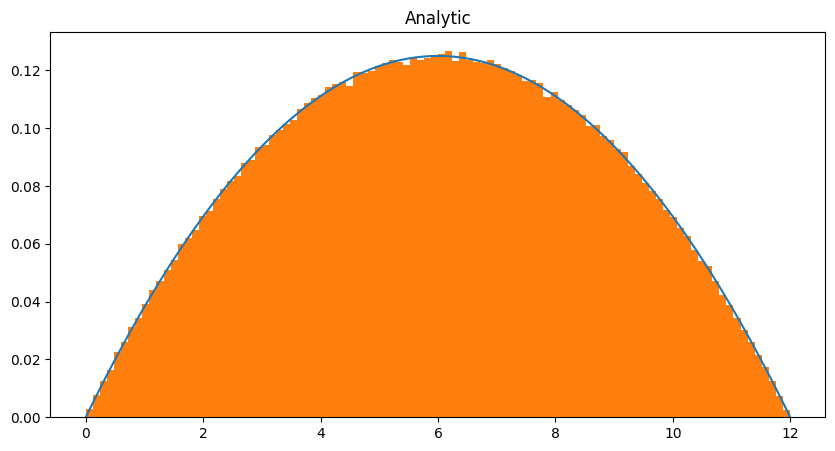

In [8]:
fig, (ax1) = plt.subplots(1,1, figsize = (10,5))
sample_analytic, norm_analytic = gf.sample(mi.Float(sample), R, mi.Float(0))
ax1.plot(r.numpy(), pdfc.numpy())
ax1.set_title("Analytic")
ax1.hist(sample_analytic.numpy(), density = True, bins = 100);